## `doralite` API Examples

Here are some examples for using the light-weight API for interacting with the Dora website in a Jupyter notebook

In [1]:
%matplotlib inline

import json
import subprocess

import doralite
import gfdlvitals

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

### Search Dora for Experiments

Using the string 'am5', we can search Dora for all matching experiments:

In [2]:
doralite.search('am5')

{1789: '/archive/djp/am5/2022.01/c96L33_am4p0_cmip6Diag/gfdl.ncrc3-intel21-prod-openmp/pp/',
 1813: None,
 1841: None,
 1842: None,
 1847: 'None',
 1854: None,
 1855: 'None/',
 1856: None,
 1858: '/archive/van/am5/2022.01/c96L33_am5a0_cmip6Diag/gfdl.ncrc4-intel21-prod-openmp/pp',
 1859: None,
 1862: None,
 1863: None,
 1864: '/archive/van/am5/2022.01/c96L33_am5a0_cmip6Diag_HuanHadisst/gfdl.ncrc4-intel21-prod-openmp/pp',
 1865: 'None',
 1866: '/archive/Huan.Guo/FMS2022.01_mom6_20220703/c96L33_am4p0_cm4_exec_2010climo/gfdl.ncrc4-intel18-prod-openmp/pp/',
 1867: '/archive/Huan.Guo/FMS2022.01_mom6_20220703/c96L33_am4p0_cm4_exec/gfdl.ncrc4-intel18-prod-openmp/pp',
 1868: None,
 1869: None,
 1876: None,
 1877: None,
 1878: '/archive/Eric.Stofferahn/am5/2022.01/c96L33_am5a0/gfdl.ncrc5-intel22-classic-prod-openmp/pp/',
 1879: '/archive/Test.User/am5/2022.01/c384L65_am5a0/gfdl.ncrc4-intel21-prod-openmp/pp/',
 1880: '/archive/Eric.Stofferahn/am5/2022.01/c96L33_am5a0_cosp/gfdl.ncrc5-cce-repro-ope

### Obtain Metadata for an Experiment

Once we know the id number for an experiment, the API can return a dictionary with the metadata associated with that experiment.

In [3]:
metadata = doralite.dora_metadata(1884)
for k in sorted(metadata.keys()):
    print(f'{k}: {metadata[k]}')

displayName: None
expLabels: None
expLength: None
expMIP: None
expName: c96L33_am5f1a0r0_amip
expType: amip
expYear: None
gfdlHistoryYear: None
id: 1884
jobID: None
modelType: AM4
owner: David.Paynter
pathAnalysis: /nbhome/David.Paynter/am5/am5f1a0r0/c96L33_am5f1a0r0_amip/
pathDB: /home/David.Paynter/am5/am5f1a0r0/c96L33_am5f1a0r0_amip/gfdl.ncrc3-intel21-prod-openmp/db/
pathHistory: /archive/David.Paynter/am5/am5f1a0r0/c96L33_am5f1a0r0_amip/gfdl.ncrc3-intel21-prod-openmp/history/
pathLog: None
pathPP: /archive/David.Paynter/am5/am5f1a0r0/c96L33_am5f1a0r0_amip/gfdl.ncrc3-intel21-prod-openmp/pp/
pathScript: /home/David.Paynter/am5/am5f1a0r0/c96L33_am5f1a0r0_amip/ncrc3.intel21-prod-openmp/scripts/c96L33_am5f1a0r0_amip/
pathXML: /home/djp/ncrc/am5_1_25_2023/am5xml/am5.xml/
queue: None
refresh: None
source: sql
status: None
urlCurator: None
userName: David.Paynter


### Obtaining Global Mean Data as a DataFrame

The API can return a Pandas DataFrame for a given experiment id.  The dataframe can then be plotted, analyzed, and exported to a NumPy array

In [4]:
# get the data in JSON format from the server
result = doralite.global_mean_data(1884,'globalAveAtmos')

# convert JSON to a dict object
result =  json.loads(result)

# convert to VitalsDataFrame object
df = gfdlvitals.extensions.VitalsDataFrame(result)
df.head()

,area,ps,slp_dyn,uw_precip,cbmf_uwc,prec_uwd,enth_ls_col,enth_uw_col,enth_conv_col,wat_ls_col,...,swup_toa_ad_clr,swdn_sfc_ad_clr,swup_sfc_ad_clr,lwsfc_ad_clr,lwtoa_ad_clr,swup_toa_ad,swdn_sfc_ad,swup_sfc_ad,lwsfc_ad,lwtoa_ad
1979-07-01 12:00:00,5.100645e+14,98520.130,1011.01330,0.000016,0.017542,0.000013,1.790073e-16,0.0,0.0,-6.056634e-23,...,47.745132,252.67409,31.495480,82.288880,263.41437,98.52938,193.25902,24.717216,59.668130,239.35880
1980-07-01 12:00:00,5.100645e+14,98521.110,1010.98730,0.000017,0.017604,0.000013,1.793097e-16,0.0,0.0,-5.977470e-23,...,47.698494,252.62965,31.455680,82.253880,263.58096,98.54937,193.14737,24.669947,59.672710,239.53030
1981-07-01 12:00:00,5.100645e+14,98519.234,1010.97560,0.000016,0.017593,0.000012,1.792986e-16,0.0,0.0,-6.127390e-23,...,47.670563,252.69165,31.417622,82.322914,263.43747,98.77966,192.84279,24.565150,59.652485,239.30779
1982-07-01 12:00:00,5.100645e+14,98518.980,1010.99050,0.000016,0.017682,0.000012,1.779359e-16,0.0,0.0,-5.998136e-23,...,47.750072,252.71204,31.495802,82.321370,263.19058,98.80847,192.91565,24.684381,59.604183,239.22476
1983-07-01 12:00:00,5.100645e+14,98521.125,1010.99207,0.000016,0.017782,0.000012,1.824223e-16,0.0,0.0,-6.067627e-23,...,47.861046,252.68980,31.605570,82.127820,263.65005,98.63997,193.22859,24.811516,59.472702,239.85747


### Simple plot of 2-m Near-Surface Temperature

<Axes: >

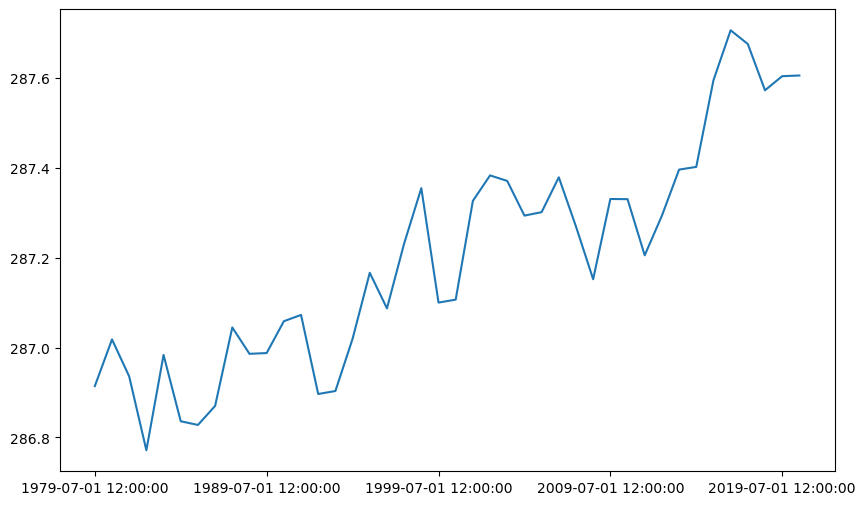

In [5]:
df.t_ref.plot(figsize=(10,6))

### More complex plot with using seaborn

Here, we regress total cloud amount vs near-surface temperature

<Axes: xlabel='t_ref', ylabel='tot_cld_amt'>

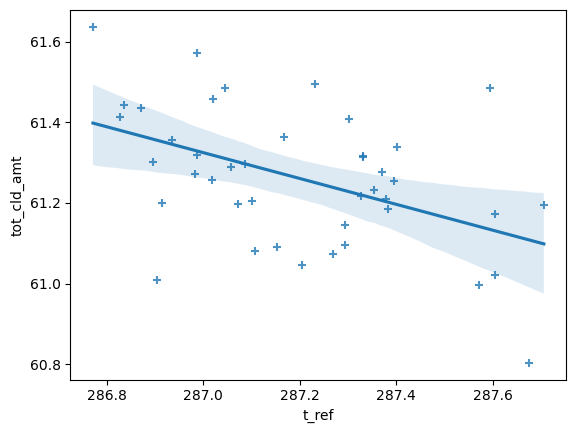

In [6]:
sns.regplot(x='t_ref', y='tot_cld_amt', marker="+", data=df)

### Export variable to NumPy array

In [7]:
array = df.t_ref.to_numpy()
array

array([286.9143 , 287.01828, 286.93588, 286.7715 , 286.98373, 286.8361 ,
       286.82788, 286.87024, 287.0449 , 286.98624, 286.9879 , 287.05875,
       287.07285, 286.89676, 286.90344, 287.01968, 287.16666, 287.08737,
       287.2317 , 287.35504, 287.1003 , 287.10687, 287.32666, 287.3834 ,
       287.37106, 287.2939 , 287.30157, 287.37915, 287.26956, 287.15225,
       287.33087, 287.3305 , 287.20554, 287.29367, 287.39627, 287.40234,
       287.59518, 287.70645, 287.67584, 287.5729 , 287.60428, 287.6058 ])

In [8]:
print(f'The shape of the array is {array.shape}')
print(f'The mean of the array is {array.mean()}')
print(f'The standard deviation of the array is {array.std()}')
print('(Note: these statistics are not area weighted.)')

The shape of the array is (42,)
The mean of the array is 287.19937047619044
The standard deviation of the array is 0.24790082443775147
(Note: these statistics are not area weighted.)


## Example workflow to plot the zonal mean temperature trend

In [9]:
# Get metadata about experiment 1884
metadata = doralite.dora_metadata(1884)
metadata['pathPP']

'/archive/David.Paynter/am5/am5f1a0r0/c96L33_am5f1a0r0_amip/gfdl.ncrc3-intel21-prod-openmp/pp/'

In [10]:
# Contruct path to a real file on /archive
filepath = metadata['pathPP']+'atmos_cmip/ts/monthly/42yr/atmos_cmip.197901-202012.ta.nc' 
filepath

'/archive/David.Paynter/am5/am5f1a0r0/c96L33_am5f1a0r0_amip/gfdl.ncrc3-intel21-prod-openmp/pp/atmos_cmip/ts/monthly/42yr/atmos_cmip.197901-202012.ta.nc'

In [12]:
# dmget the file inside Jupyter
out = subprocess.check_output(["dmget",filepath])

In [13]:
# Load file as an xarray dataset
ds = xr.open_dataset(filepath,use_cftime=True)
ds

<xarray.Dataset>
Dimensions:     (time: 504, bnds: 2, lat: 180, lon: 288, plev19: 19)
Coordinates:
  * bnds        (bnds) float64 1.0 2.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * plev19      (plev19) float64 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
  * time        (time) object 1979-01-16 12:00:00 ... 2020-12-16 12:00:00
Data variables:
    average_DT  (time) timedelta64[ns] ...
    average_T1  (time) object ...
    average_T2  (time) object ...
    lat_bnds    (lat, bnds) float64 ...
    lon_bnds    (lon, bnds) float64 ...
    ta          (time, plev19, lat, lon) float32 ...
    time_bnds   (time, bnds) object ...
Attributes:
    title:                 c96L33_am5f1a0r0_amip
    associated_files:      area: 20200101.grid_spec.nc
    grid_type:             regular
    grid_tile:             N/A
    code_release_version:  2022.02
    git_hash:              83acb799f47dfa27b433a131e9f7c1310767cc59
    creationtime:          Sat Feb 11 02:33:26 2023
    hostname:              pp031
    history:               fregrid --standard_dimension --input_mosaic C96_mo...
    external_variables:    area

In [14]:
# Calculate the zonal mean
ta_xave = ds.ta.mean("lon")
ta_xave

<xarray.DataArray 'ta' (time: 504, plev19: 19, lat: 180)>
array([[[      nan,       nan,       nan, ..., 242.7117 , 242.51814,
         242.31874],
        [      nan,       nan,       nan, ..., 249.24875, 249.17133,
         249.08803],
        [      nan,       nan,       nan, ..., 249.94417, 249.87082,
         249.77968],
        ...,
        [247.60965, 247.60248, 247.58664, ..., 201.47192, 201.3897 ,
         201.35529],
        [259.16058, 259.14548, 259.11517, ..., 205.08307, 204.92155,
         204.83473],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ..., 240.93866, 240.73155,
         240.71628],
        [      nan,       nan,       nan, ..., 247.54872, 247.48741,
         247.50934],
        [      nan,       nan,       nan, ..., 248.66734, 248.5677 ,
         248.5323 ],
...
        [247.02441, 246.98671, 246.9267 , ..., 213.1286 , 213.11493,
         213.1082 ],
        [254.39499, 254.35986, 254.29395, ..., 215.00848, 214.99236,
         214.98521],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ..., 252.03934, 251.99724,
         252.01996],
        [      nan,       nan,       nan, ..., 256.4884 , 256.44745,
         256.4581 ],
        [      nan,       nan,       nan, ..., 255.18837, 255.15265,
         255.10732],
        ...,
        [246.69545, 246.67966, 246.64606, ..., 199.54303, 199.48856,
         199.46498],
        [256.70404, 256.6853 , 256.64822, ..., 199.71742, 199.64784,
         199.61363],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * plev19   (plev19) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time     (time) object 1979-01-16 12:00:00 ... 2020-12-16 12:00:00

In [15]:
# Fit a line to the data along the `time` dimension

fitted = ta_xave.polyfit("time",1)
slope = fitted.polyfit_coefficients[0]

In [16]:
# xarray's slope is in nanoseconds, convert to decade
slope = slope * 1e9 * 86400 * 365 * 10

Text(0.01, 1.05, 'c96L33_am5f1a0r0_amip\nLinear Trend in Air Temperature')

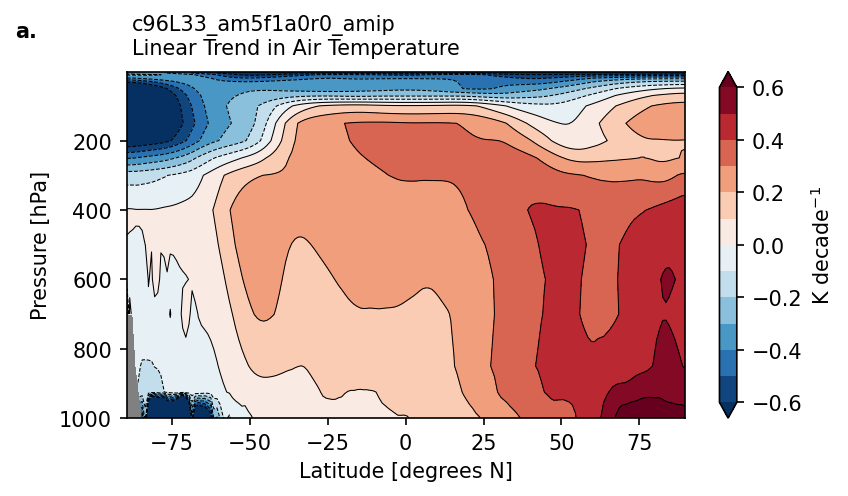

In [17]:
fig = plt.figure(figsize=(6,3),dpi=150)
ax = plt.subplot(1,1,1, facecolor="gray")

levels = np.arange(-0.6,0.7,0.1)

cb = ax.contourf(slope.lat,slope.plev19/100.,slope,levels=levels,cmap="RdBu_r",extend="both")
ax.contour(slope.lat,slope.plev19/100.,slope,levels=levels,colors=["k"],linewidths=0.5)

ax.invert_yaxis()
ax.set_xlabel("Latitude [degrees N]")
ax.set_ylabel("Pressure [hPa]")

plt.colorbar(cb,label=r"K decade$^{-1}$")

ax.text(-0.2,1.1,"a.",weight="bold",transform=ax.transAxes)
ax.text(0.01,1.05,f"{metadata['expName']}\nLinear Trend in Air Temperature",ha="left",transform=ax.transAxes)